# Classification of MNIST Dataset using Deep Neural networks,SVM and Logistic Regression 

In [1]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

Using TensorFlow backend.


Loading MNIST dataset and dividing the dataset to training data,Validation data and Test dataset.

In [2]:
(train_data,train_label),(test_data,test_label)=mnist.load_data()
train_data,val_data,train_label,val_label=train_test_split(train_data,train_label,test_size=0.2,random_state=66)

In [3]:
print('Train data shape:',train_data.shape)
print('Train label shape:',train_label.shape)
print('validation data shape:',val_data.shape)
print('validation label shape:',val_label.shape)
print('Test data shape:',test_data.shape)
print('Test labelshape:',test_label.shape)

Train data shape: (48000, 28, 28)
Train label shape: (48000,)
validation data shape: (12000, 28, 28)
validation label shape: (12000,)
Test data shape: (10000, 28, 28)
Test labelshape: (10000,)


Data Pre-Processing: Reshape the train,validation and test data and since the pixel values varies between [0,255], we need to normalize the data between [0,1].

In [4]:
# Reshaping data
train_data =train_data.reshape((len(train_data),784))
val_data = val_data.reshape((len(val_data),784))
test_data = test_data.reshape((len(test_data),784))

print('Train data shape:',train_data.shape)
print('validation data shape:',val_data.shape)
print('Test labelshape:',test_label.shape)



# Normalizing data
train_data = tf.keras.utils.normalize(train_data,axis=1)
val_data = tf.keras.utils.normalize(val_data,axis=1)
test_data = tf.keras.utils.normalize(test_data,axis=1)

Train data shape: (48000, 784)
validation data shape: (12000, 784)
Test labelshape: (10000,)


Data Visualization using Principal component Analysis and T-Distributed Stochastic Neighbor Embedding

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.preprocessing import scale

Principal component Analysis

Explained Variance:0.22451729469231402


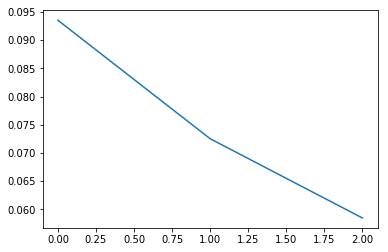

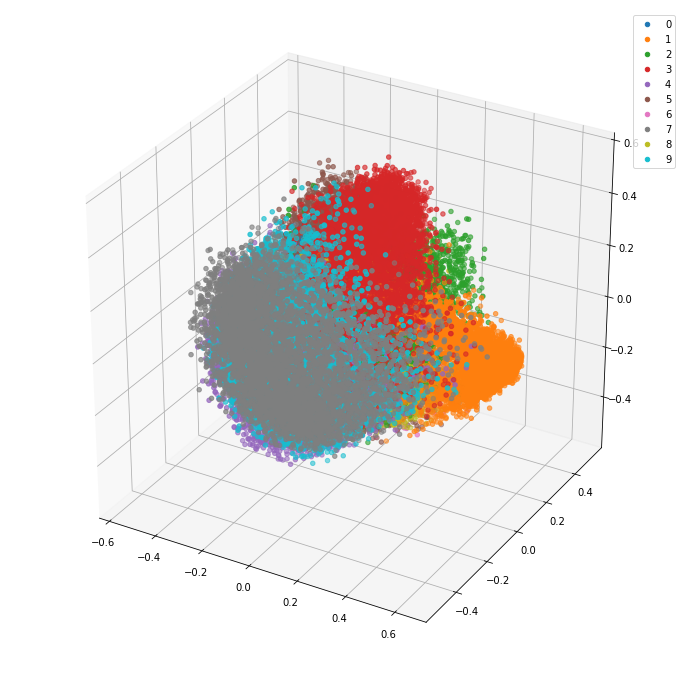

In [6]:
labels = train_label
pca = PCA(n_components=3) #I have choosen 3 principal component for visualization
pca.fit(train_data)
print('Explained Variance:'+str(np.sum(pca.explained_variance_ratio_)))
plt.plot(pca.explained_variance_ratio_)

z=pca.transform(train_data)
fig = plt.figure(figsize=[12,12])
ax = fig.gca(projection='3d')
for i in range(10):
    inds = np.where(labels == i)[0]
    ax.scatter(z[inds,0],z[inds,1],z[inds,2],c='C%d'%i,label='%d'%i)
plt.legend()

T-Distributed Stochastic Neighbor Embedding(T-SNE)

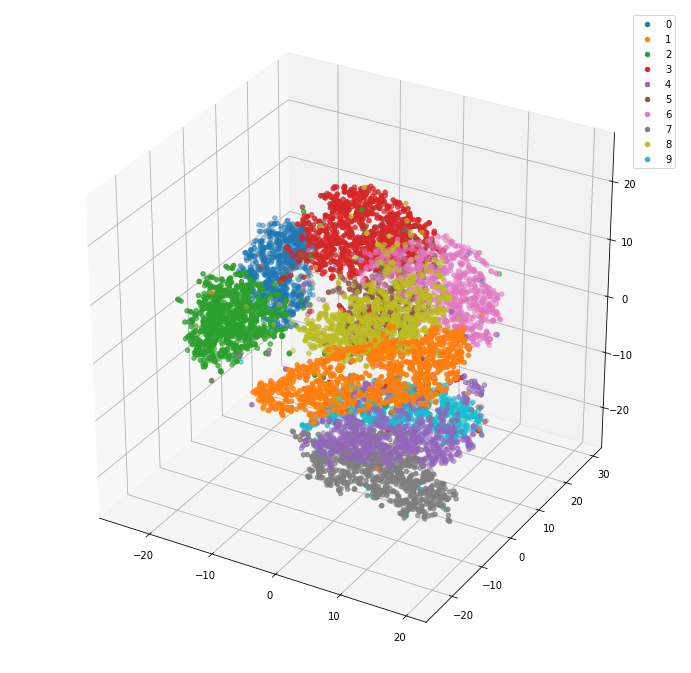

In [7]:
all_data = pd.DataFrame(train_data)
all_data['labels']=labels
all_data = all_data[0:10000] # I have 10000 data samples for the visualization use TSNE
d=all_data.iloc[:,0:784] 


tsne= TSNE(n_components=3)
v =  tsne.fit_transform(d)
fig = plt.figure(figsize=[12,12])
ax = fig.gca(projection='3d')
for i in range(10):
    inds = np.where(all_data['labels'] == i)[0]
    ax.scatter(v[inds,0],v[inds,1],v[inds,2],c='C%d'%i,label='%d'%i)
plt.legend()

# Defining the Neural network architecture

The Deep Neural network architecture consists of:
1. 1st Dense layer consisting of 128 neurons that are fully connected with Relu activation function
2. 2nd Dense layer consisting of 128 neurons that are fully connected with Relu activation function
3. 3rd Dense layer consisting of 64 neurons that are fully connected with Relu activation function
4. 4th Dense layer consisting of 10 neurons that are fully connected with Softmax activation function

In [16]:
Network = tf.keras.models.Sequential()
Network.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
Network.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
Network.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
Network.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

Complie the network i.e we need to choose a loss function,optimizer and accuracu metrics

In [18]:
Network.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

Training the Neural network

In [19]:
Training_NN = Network.fit(train_data,train_label,epochs=10,verbose=1,validation_data=(val_data,val_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 126us/sample - loss: 0.3463 - acc: 0.8995 - val_loss: 0.1931 - val_acc: 0.9432
Epoch 2/10
48000/48000 [==============================] - 5s 113us/sample - loss: 0.1428 - acc: 0.9560 - val_loss: 0.1234 - val_acc: 0.9627
Epoch 3/10
48000/48000 [==============================] - 5s 109us/sample - loss: 0.0967 - acc: 0.9700 - val_loss: 0.1048 - val_acc: 0.9678
Epoch 4/10
48000/48000 [==============================] - 5s 111us/sample - loss: 0.0723 - acc: 0.9768 - val_loss: 0.0989 - val_acc: 0.9730
Epoch 5/10
48000/48000 [==============================] - 6s 119us/sample - loss: 0.0574 - acc: 0.9817 - val_loss: 0.1032 - val_acc: 0.9696
Epoch 6/10
48000/48000 [==============================] - 5s 110us/sample - loss: 0.0472 - acc: 0.9847 - val_loss: 0.1017 - val_acc: 0.9724
Epoch 7/10
48000/48000 [==============================] - 5s 113us/sample - loss: 0.0375 - acc: 0.9877 - val_l

In [23]:
train_accuracy = Training_NN.history['acc']
train_loss = Training_NN.history['loss']
validation_accuracy = Training_NN.history['val_acc']
validation_loss = Training_NN.history['val_loss']
Number_of_epochs = range(len(train_accuracy))

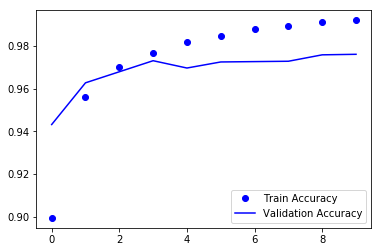

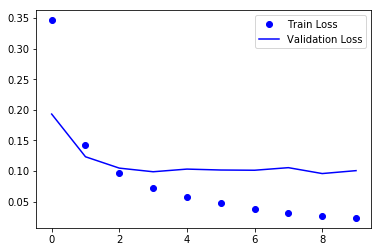

In [24]:
plt.plot(Number_of_epochs,train_accuracy,'bo',label='Train Accuracy')
plt.plot(Number_of_epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title=('Train and Validation Accuracies')
plt.legend()

plt.figure()
plt.plot(Number_of_epochs,train_loss,'bo',label='Train Loss')
plt.plot(Number_of_epochs,validation_loss,'b',label='Validation Loss')
plt.title=('Train and Validation Loss')
plt.legend()

Evaluating Networks performance of the Test Dataset

In [20]:
test_loss,test_acc = Network.evaluate(test_data,test_label)
print('Test Accuracy:'+ str(test_acc))

10000/10000 [==============================] - 1s 51us/sample - loss: 0.0956 - acc: 0.9774
Test Accuracy:0.9774


The Deep Neural network performs better on the test data giving an accuracy of 97.74%

# Support Vector Machines

In [5]:
from scipy.optimize import minimize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [6]:
np.random.seed()
train_df = pd.DataFrame(train_data)
train_df['train_label'] = train_label
train_df = train_df.sample(n=25000)
validation_df = pd.DataFrame(val_data)
validation_df['val_label'] = val_label
test_df = pd.DataFrame(test_data)
test_df['test_label']=test_label

In [7]:
print('Shape of Train data frame:',train_df.shape)
print('Shape of Validation data frame:',validation_df.shape)
print('Shape of Test data frame:',test_df.shape)

Shape of Train data frame: (25000, 785)
Shape of Validation data frame: (12000, 785)
Shape of Test data frame: (10000, 785)


In [11]:
svm_rbf_model = SVC(kernel='rbf')
svm_rbf_model.fit(train_df[train_df.columns.difference(['train_label'])],train_df.train_label)
pred_values = svm_rbf_model.predict(train_df[train_df.columns.difference(['train_label'])])
print('\n Training set Accuracy for RBF(gamma =default):' + str(100 * np.mean((pred_values == train_df.train_label).astype(float))) + '%')

pred_values = svm_rbf_model.predict(validation_df[validation_df.columns.difference(['val_label'])])
print('\n validation set Accuracy for RBF(gamma =default):' + str(100 * np.mean((pred_values == validation_df.val_label).astype(float))) + '%')

pred_values = svm_rbf_model.predict(test_df[test_df.columns.difference(['test_label'])])
print('\n Test set Accuracy for RBF(gamma =default):' + str(100 * np.mean((pred_values == test_df.test_label).astype(float))) + '%')


 Training set Accuracy for RBF(gamma =default):72.272%

 validation set Accuracy for RBF(gamma =default):71.66666666666667%

 Test set Accuracy for RBF(gamma =default):72.45%


In [18]:
svm_linear_model = SVC(kernel='linear')
svm_linear_model.fit(train_df[train_df.columns.difference(['train_label'])],train_df.train_label)
pred_values = svm_linear_model.predict(train_df[train_df.columns.difference(['train_label'])])
print('\n Training set Accuracy for Linear(gamma =default):' + str(100 * np.mean((pred_values == train_df.train_label).astype(float))) + '%')

pred_values = svm_linear_model.predict(validation_df[validation_df.columns.difference(['val_label'])])
print('\n validation set Accuracy for Linear(gamma =default):' + str(100 * np.mean((pred_values == validation_df.val_label).astype(float))) + '%')

pred_values = svm_linear_model.predict(test_df[test_df.columns.difference(['test_label'])])
print('\n Test set Accuracy for Linear(gamma =default):' + str(100 * np.mean((pred_values == test_df.test_label).astype(float))) + '%')


 Training set Accuracy for Linear(gamma =default):94.74000000000001%

 validation set Accuracy for Linear(gamma =default):93.50833333333334%

 Test set Accuracy for Linear(gamma =default):93.97%


From the Data visualization techniques it is clear that the all the 10 classes are Seperable and SVM with linear Kernel(Linear decision boundary) gives a good Test accuracy of 94% as opposed to SVM with 'rbf'(non-Linear decision boundary) with accuracy of 72.45%.Also, the complexity to train SVM with 'rbf' will grow with increase with the size of the training dataset.

# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
LR_model = LogisticRegression(solver='lbfgs',verbose=1)

In [10]:
LR_training = LR_model.fit(train_data,train_label)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   36.0s finished


In [11]:
pred_LR = LR_model.predict(val_data)
print('\n validation set Accuracy ' + str(100 * np.mean((pred_LR == val_label).astype(float))) + '%')


 validation set Accuracy 90.575%


In [14]:
pred_test = LR_model.predict(test_data)
print('\n Test set Accuracy ' + str(100 * np.mean((pred_test == test_label).astype(float))) + '%')


 Test set Accuracy 91.45%


# Conclusions

On comparing the results of Deep Neural networks,SVM and Logistic regression, the Deep Neural networks outperforms SVM and Logistic regression with the Test Accuracy of 97.74% as opposed to 94% and 91.45% of SVM(linear Kernel) and Logistic regression respectively.